# Data Wrangling


  <h1>⚪ Preparation</h1>

  <style>
    h1 {
      color:darkblue;
      text-align: center;
      vertical-align: middle;
      border-radius: 67px;
      border: 1px solid #fff;
      background: linear-gradient(
        180deg,
        #d9d9d9 82.92%,
        rgba(217, 217, 217, 0) 100%
      );
      box-shadow: 15px 13px 8.2px 9px rgba(0, 0, 0, 0.25);
    }
  </style>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg

  <h1>⚪ Gathering Data</h1>

  <style>
    h1 {
      color:darkblue;
      text-align: center;
      vertical-align: middle;
      border-radius: 67px;
      border: 1px solid #fff;
      background: linear-gradient(
        180deg,
        #d9d9d9 82.92%,
        rgba(217, 217, 217, 0) 100%
      );
      box-shadow: 15px 13px 8.2px 9px rgba(0, 0, 0, 0.25);
    }
  </style>


In [2]:
customers_df = pd.read_csv("./Dataset/customers.csv")
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [3]:
orders_df = pd.read_csv("./Dataset/orders.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [4]:
products_df = pd.read_csv("./Dataset/products.csv")
products_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [5]:
sales_df = pd.read_csv("./Dataset/sales.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


  <h1>⚪ Assessing Data</h1>

  <style>
    h1 {
      color:darkblue;
      text-align: center;
      vertical-align: middle;
      border-radius: 67px;
      border: 1px solid #fff;
      background: linear-gradient(
        180deg,
        #d9d9d9 82.92%,
        rgba(217, 217, 217, 0) 100%
      );
      box-shadow: 15px 13px 8.2px 9px rgba(0, 0, 0, 0.25);
    }
  </style>


## Assess the customers table


In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [7]:
# Check missing value in table customers

customers_df.isna().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

In [8]:
# Check duplicate value in table customers

print("Total duplicate value:", customers_df.duplicated().sum())

Total duplicate value: 6


In [9]:
# Check Statistics of table customers

customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


## Assess the order table


In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [11]:
# Change the order_id attribute to string

orders_df["order_id"] = orders_df["order_id"].astype(str)

#  Check the data type of order_id attribute

orders_df["order_id"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: order_id
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [12]:
# Change the delivery_date attribute to datetime

orders_df["delivery_date"] = pd.to_datetime(orders_df["delivery_date"])

# Check the data type of the delivery_date attribute

orders_df["delivery_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: delivery_date
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [13]:
# Check duplicate value in table orders

print("Total duplicate value:", orders_df.duplicated().sum())

orders_df.describe()

Total duplicate value: 0


,customer_id,payment,delivery_date
count,1000.000000,1000.000000,1000
mean,506.640000,33972.936000,2021-06-10 20:31:12
min,1.000000,10043.000000,2021-01-03 00:00:00
25%,275.250000,21329.250000,2021-03-28 00:00:00
50%,515.000000,33697.500000,2021-06-11 12:00:00
75%,737.250000,46249.000000,2021-08-24 06:00:00
max,1000.000000,59910.000000,2021-11-20 00:00:00
std,277.115502,14451.609047,NaN


<Axes: xlabel='age'>

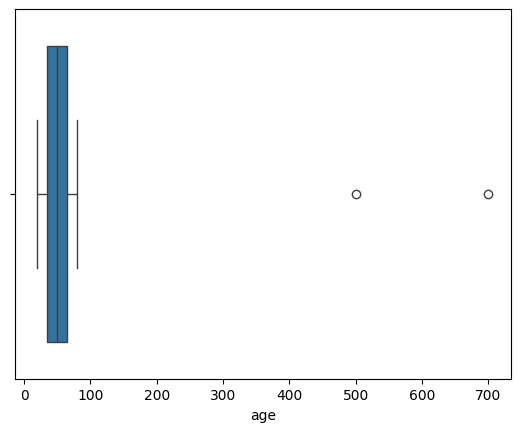

In [14]:
# plot the boxplot for attribute age

sns.boxplot(x=customers_df["age"])

## Assess the product table


In [15]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.3+ KB


In [16]:
# Check duplicate value in table products

print("Total dupliacate value: ", products_df.duplicated().sum())

products_df.describe()

Total dupliacate value:  6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


## Assess the sales table


In [17]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [18]:
# Check missing value in table sales

sales_df.isna().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

In [19]:
# Check duplicate values in table sales

print("Total duplicate value: ", sales_df.duplicated().sum())

sales_df.describe()

Total duplicate value:  0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


## Summary of the assessment process


| NO  |  TABLE NAME  |                                      TIPE DATA                                      |                   MISSING VALUE                    |        DUPLICATE DATA         |             INACCURATE VALUE             |
| :-: | :----------: | :---------------------------------------------------------------------------------: | :------------------------------------------------: | :---------------------------: | :--------------------------------------: |
| 1.  | customers_df |         There are two invalid data types in column customer_id & zip_code.          |   There are 18 missing values in column gender.    | There are 6 duplicate values. | There is inaccurate value in column age. |
| 2.  |  orders_df   | There are three invalid data types in column order_id, order_date, & delivery_date. |                         -                          |               -               |                    -                     |
| 3.  | products_df  |                There is one invalid data_types in column product_id.                |                         -                          | There are 6 duplicate values. |                    -                     |
| 4.  |   sales_df   |   There are three invalid data types in column sales_id, order_id, & product_id.    | There are 19 missing values in column total_price. |               -               |                    -                     |


  <h1>⚪ Cleaning Data</h1>

  <style>
    h1 {
      color:darkblue;
      text-align: center;
      vertical-align: middle;
      border-radius: 67px;
      border: 1px solid #fff;
      background: linear-gradient(
        180deg,
        #d9d9d9 82.92%,
        rgba(217, 217, 217, 0) 100%
      );
      box-shadow: 15px 13px 8.2px 9px rgba(0, 0, 0, 0.25);
    }
  </style>


## Cleaning the table customer


## Handling format data type


In [20]:
# Change the customer_id attribute to object(string)

customers_df["customer_id"] = customers_df["customer_id"].astype(str)

# Check the data type of customer_id attribute

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   object
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(2), object(7)
memory usage: 70.9+ KB


In [21]:
# Change the zip_code attribute to object(string)

customers_df["zip_code"] = customers_df["zip_code"].astype(str)

# Check the data type of zip_code attribute

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   object
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   object
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.9+ KB


## Handling missing values


In [22]:
# Check the null value in table customers

customers_df.loc[customers_df["gender"].isna()]

# customers_df[customers_df['gender'].isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


In [23]:
# Identify dominant value in column gender

customers_df.gender.value_counts()

gender
Prefer not to say    731
Male                 143
Female               115
Name: count, dtype: int64

In [24]:
# Impute the dominant value into null values

customers_df.fillna(value="Prefer not to say", inplace=True)

In [25]:
# Check the missing values again

customers_df.isna().sum().sum()

0

## Handling duplicate values


In [26]:
# Drop duplicate values

customers_df.drop_duplicates(inplace=True)

# Check the duplicate values again

print("Total duplicate values: ", customers_df.duplicated().sum())

Total duplicate values:  0


## Handling inaccurate values


In [27]:
# Filter the data to find the customers who have inaccurate values in age column

customers_df.loc[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


In [28]:
# Replace the inaccurate values of age column with 70 (This might happen because of typo)

customers_df["age"].replace(customers_df.age.max(), value=70, inplace=True)

In [29]:
# Check the customers who have inaccurate values in age column again

customers_df.loc[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


In [30]:
# Replace the inaccurate values of age column with 50 (This might happen because of typo)

customers_df["age"].replace(customers_df.age.max(), value=50, inplace=True)

In [31]:
# Check the customers who have inaccurate values in age column again

customers_df.loc[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
34,35,fulan 35,Male,80,3168 Bartoletti CrescentSuite 878,593,Port Lucas,Queensland,Australia
38,39,fulan 39,Prefer not to say,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
142,143,fulan 143,Prefer not to say,80,87 Hahn Station StSuite 943,8254,New Ella,Victoria,Australia
154,155,fulan 155,Male,80,85 Charles MallSuite 424,7841,Port Sophia,New South Wales,Australia
170,171,fulan 171,Prefer not to say,80,16 Boyer WaySuite 018,6226,South Gabriel,Western Australia,Australia
174,175,fulan 175,Prefer not to say,80,57 David MallSuite 596,3129,Haneton,South Australia,Australia
181,182,fulan 182,Male,80,32 Thomas CrestSuite 753,2147,Archiefurt,Queensland,Australia
235,236,fulan 236,Prefer not to say,80,64 Phillips RunApt. 722,2752,East Sienna,New South Wales,Australia
424,424,fulan 424,Prefer not to say,80,03 Grant CrestSuite 228,5743,Lake Charliemouth,Western Australia,Australia
438,438,fulan 438,Prefer not to say,80,569 Alyssa IslandApt. 766,6893,Hunterland,Western Australia,Australia


In [32]:
# Check the statistics of table customers again

customers_df.describe()

,age
count,1000.000000
mean,49.860000
std,17.647828
min,20.000000
25%,34.000000
50%,50.000000
75%,65.000000
max,80.000000


## Cleaning the table order


## Handling format data type


In [33]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   object        
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   object        
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 39.2+ KB


In [34]:
# Change the order_id & customer_id attributes to object(string)

orders_df["order_id"] = orders_df["order_id"].astype(str)

orders_df["customer_id"] = orders_df["customer_id"].astype(str)

# Check the data type of order_id & customer_id attributes

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   object        
 1   customer_id    1000 non-null   object        
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   object        
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 39.2+ KB


## Cleaning the table products


## Handling format data type


In [35]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.3+ KB


In [36]:
# Change the product_id attribute to object(string)

products_df["product_id"] = products_df["product_id"].astype(str)

# Check the data type of product_id attribute

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   object
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(2), object(6)
memory usage: 79.3+ KB


## Handling duplicate value


In [37]:
# Drop duplicate values in column

products_df.loc[products_df.duplicated()]

,product_id,product_type,product_name,size,colour,price,quantity,description
112,54,Shirt,Dress,XL,green,119,52,"A green coloured, XL sized, Dress Shirt"
232,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
365,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
435,377,Shirt,Henley,M,indigo,92,70,"A indigo coloured, M sized, Henley Shirt"
540,483,Jacket,Puffer,L,indigo,110,61,"A indigo coloured, L sized, Puffer Jacket"
587,579,Jacket,Bomber,XL,green,90,79,"A green coloured, XL sized, Bomber Jacket"


In [38]:
products_df.loc[
    products_df["product_id"] == "146"
]  # This means the data shown in the table above is the only duplicate value

,product_id,product_type,product_name,size,colour,price,quantity,description
147,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
232,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
365,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"


In [39]:
# Drop duplicate values

products_df.drop_duplicates(inplace=True)

# Check the duplicate values again

print("Total duplicate values: ", products_df.duplicated().sum())

Total duplicate values:  0


## Cleaning the table sales


## Handling format data type


In [40]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [41]:
#  Change the data type of sakes_id, order_id, & product_id attributes to object(string)

sales_df["sales_id"] = sales_df["sales_id"].astype(str)

sales_df["order_id"] = sales_df["order_id"].astype(str)

sales_df["product_id"] = sales_df["product_id"].astype(str)

#  Check the data type of sales_id, order_id, & product_id attributes

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   object 
 1   order_id        5000 non-null   object 
 2   product_id      5000 non-null   object 
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


## Handling Missing Values


In [42]:
# Check missing value

sales_df.loc[sales_df.isna().any(axis=1)]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [43]:
# Since the total_price attribute is the result of quantity * price, we can impute the missing value with: total_price = quantity * price_per_unit

sales_df["total_price"] = sales_df["quantity"] * sales_df["price_per_unit"]

In [44]:
# Check the missing value again

sales_df.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

  <h1>⚪ End of the process</h1>

  <style>
    h1 {
      color:darkblue;
      text-align: center;
      vertical-align: middle;
      border-radius: 67px;
      border: 1px solid #fff;
      background: linear-gradient(
        180deg,
        #d9d9d9 82.92%,
        rgba(217, 217, 217, 0) 100%
      );
      box-shadow: 15px 13px 8.2px 9px rgba(0, 0, 0, 0.25);
    }
  </style>


# Exploratory Data Analysis


## Business Question


| NO  |                                 BUSINESS QUESTION                                 |
| :-: | :-------------------------------------------------------------------------------: |
| 1.  | How have the company's sales and revenue performance been in the last few months? |
| 2.  |                      What products sell the most and least?                       |
| 3.  |                    What are the demographics of our customers?                    |
| 4.  |               When was the last time a customer made a transaction?               |
| 5.  |            How often has a customer purchased in the last few months?             |
| 6.  |            How much money have customers spent in the last few months?            |


## Explore all the data from dataset


### EDA customers_df


In [45]:
customers_df.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1000,1000,1000,1000.000000,1000,1000,1000,1000,1000
unique,1000,1000,3,NaN,1000,955,961,8,1
top,1,fulan 1,Prefer not to say,NaN,8606 Victoria TerraceSuite 560,789,East Sophia,South Australia,Australia
freq,1,1,742,NaN,1,3,3,139,1000
mean,NaN,NaN,NaN,49.860000,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,17.647828,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN


In [46]:
# Check the demography customers based on gender

customers_df.groupby(by="gender").agg(
    {"customer_id": "nunique", "age": ["max", "min", "mean", "std"]}
)

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.706199  17.648386

In [50]:
# Check the distribution of the number of customers by city.

customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)

city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
                ..
Jordanside       1
Josephland       1
Josephmouth      1
Justinport       1
Zacville         1
Name: customer_id, Length: 961, dtype: int64

In [51]:
# Check the distribution of the number of customers by state.

customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64